# Text Classification on Interpress

## Analyze and Preprocess Dataset

In [1]:
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm.notebook import tqdm

def clean_turkish_text(text):
    
    # Remove non-alphabetic characters, excluding dots and commas, then tokenize
    words = word_tokenize(re.sub(r'[^a-zA-ZığüşöçĞÜŞÖÇ\s.,]', ' ', text))

    # Get Turkish stop words
    turkish_stop_words = set(stopwords.words('turkish'))

    # Keep only Turkish words that are not stop words
    turkish_words = [word for word in words if word.lower() not in turkish_stop_words]

    return ' '.join(turkish_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\onurp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import csv
csv.field_size_limit(2**31-1)

from datasets import load_dataset
import pandas as pd

interpress = load_dataset("interpress_news_category_tr_lite")

for split in interpress.keys():
    
    split_data = interpress[split].to_pandas()

    # Apply clean_turkish_text() on the 'content' column
    tqdm.pandas(desc=f'Cleaning {split} split')
    split_data['content'] = split_data['content'].progress_apply(clean_turkish_text)

    split_data = split_data.rename(columns={'content': 'text', 'category': 'label'})

    interpress[split] = split_data

del split_data

interpress_train = interpress['train']
interpress_test = interpress['test']

del interpress

display(interpress_train, interpress_test)

,text,label
0,Tarihten Sınıfta Kaldık Bugün tarihe damgasını...,0
1,"clş yatırım ortamı iyileştiriliyor , bürokrasi...",1
2,Animasyon meraklıları Yönetmen JenniferYuh Ses...,0
3,T BEEF JJ SVftSL ff BEEFSFISH KIRMIZI ET N FRA...,0
4,LPG Dolum Boşaltım kursu KTSO yapıldı Karaman ...,1
...,...,...
218875,Begüm Mert Yazıcıoğiu çiftinin ikinci bebekler...,7
218876,AKRAPOVIC FULL MOON Fiyat açıklanmadı konsept ...,6
218877,Babil bal Notlar Bugün Şenkaya ilçesine bağlı ...,0
218878,ÇEVRE STAT ST KLER N N ÖZETLER YAYINLANDI Türk...,1


,text,label
0,yıldır yükselen enerji Aygaz TÜRK HALKINI TÜPG...,1
1,Onur Akyıl Bir insan kadar mutsuzBir insan kad...,0
2,. yolculuk GÜNEYL SARIŞIN REESE WITHERSPOON Ye...,0
3,Doğru tercih yapan hiçbir aday açıkta kalmayac...,3
4,Jong sıraya girdiler SER E A ekiplerinden Mi i...,5
...,...,...
54716,"SAMBACI JAJA ALKOL ENGEL TAKILDI .m , TRABZONS...",5
54717,"Gıda Tarım Hayvancılık Bakanı Faruk Çelik , ek...",1
54718,PANORAMA Uftk . Uluslararası Whitley Doğa Koru...,0
54719,Patates tüketiminin artırılması hedefleniyor A...,1


In [7]:
interpress_train.iloc[3]['text']

'T BEEF JJ SVftSL ff BEEFSFISH KIRMIZI ET N FRANSIZ HAL BEEF yŞ Fransız mutfağı zenginliği , çeşitliliği , pişirme teknikleri , yemeğe yaklaşımı yemek pişirmenin sanatsal yönünü ön plana çıkaran bir mutfak . Kökeni Ortaçağ a kadar uzanıyor . Fransız aşçıların yüzyıllar önce keşfettiği teknikler bugün dünyanın dört bir yanındaki şeflerin yol göstericisi olmaya devam ediyor . Fransız u a sosların apayrı bir yeri Jrmızı etin Öyle ... ikili leşince ortaya muhteşem .ezzetler çıkıyor ... Fransız şef Olivier Pistre Shangri La Bosphorus Hotel Executive Chef , kırmızı etin Fransız mutfağındaki yerini anlattı , Fransızların sevdiği et tarifini paylaştı . Fotoğraflar ALT AN AYKAN f ırmızı etin Fransız mutfağında önemli bir ağırlığı var . Kırmızı etle pişirilen birçok Fransız klasiği mevcut . Fransız mutfa , ğında herkes tarafından bilinen kaz ciğeri portakallı ördek klasikler olsa rosto biftek çeşitlerinin pek farklı versiyonunu görmek mümkün . Özellikle sos kültürünün kadar gelişmiş olduğu bir m

In [3]:
interpress_train.iloc[3]['text']

'İTİ BEEF JJ SVftSL ff 44     BEEFSFISH 16)2016KIRMIZI ETİN FRANSIZ HALİ BEEF yŞ Fransız mutfağı; zenginliği, çeşitliliği, pişirme teknikleri, yemeğe yaklaşımı ile yemek pişirmenin sanatsal yönünü ön plana çıkaran bir mutfak. Kökeni Ortaçağ a kadar uzanıyor. Fransız aşçıların yüzyıllar önce keşfettiği teknikler bugün dünyanın dört bir yanındaki şeflerin yol göstericisi olmaya devam ediyor. Fransız u 7a sosların apayrı bir yeri Jrmızı etin de Öyle... Bu ikili leşince de ortaya muhteşem .ezzetler çıkıyor... Fransız şef Olivier Pistre (Shangri-La Bosphorus Hotel Executive Chef), kırmızı etin Fransız mutfağındaki yerini anlattı, Fransızların çok sevdiği 4 et tarifini paylaştı. Fotoğraflar: ALT AN AYKAN f ırmızı etin Fransız mutfağında önemli bir ağırlığı var. Kırmızı etle pişirilen birçok Fransız klasiği mevcut. Fransız mutfa, ğında herkes tarafından bilinen kaz ciğeri ya da portakallı ördek gibi klasikler olsa da rosto ve biftek çeşitlerinin de pek çok farklı versiyonunu görmek mümkün. Öz

In [8]:
interpress_train.iloc[125]['text']

'MedisanaUan Antibakteriyel Hava Nemlendirme Cihazı , vv MEDISANA , özellikle klima ısıtıcı çalışan ortamlardaki havanın nem oranının düşmesiyle ortaya çıkan solunum yolu rahatsızlıkları pratik bir çözüm sunuyor , Türkiye distribütörlüğünü GoldMaster ın üstlendiği MEDISANA , özellikle klima ısıtıcı çalışan ortamlardaki havanın nem oranının düşmesiyle ortaya çıkan solunum yolu rahatsızlıkları pratik bir çözüm sunuyor . Sağlıklı bir solunum ortamdaki ideal nem oranının arasında olması gerekiyor . oranın in altına düşmesi birtakım solunum yolları rahatsızlıklarına yol açabiliyor , Medisana , soruna modern ultrasonik teknoloji ürettiği UHW Plus hava nemlendirme cihazı ciddi bir çözüm sunuyor . Teiniz Bir Hava çin Türkiye özel olarak tasarlanan Medisana UHW Plus hava nemlendirme cihazına , Türkiye deki suların kireç içermesinden dolayı yaşanan problemleri gidermek amacıyla dünyada ilk kireç filtresi eklendi . Suyun sertliğini alan kireç önleyici seramik filtresi dikkat çeken Medisana UHW Pl

In [4]:
interpress_train.iloc[125]['text']

'MedisanaUan Antibakteriyel Hava Nemlendirme Cihazı ,vv MEDISANA, özellikle klima ya da ısıtıcı çalışan ortamlardaki havanın nem oranının düşmesiyle ortaya çıkan solunum yolu rahatsızlıkları için pratik bir çözüm sunuyor, Türkiye distribütörlüğünü GoldMaster ın üstlendiği MEDISANA, özellikle klima ya da ısıtıcı çalışan ortamlardaki havanın nem oranının düşmesiyle ortaya çıkan solunum yolu rahatsızlıkları için pratik bir çözüm sunuyor. Sağlıklı bir solunum için ortamdaki ideal nem oranının % 45 ile % 55 arasında olması gerekiyor. Bu oranın % 45 in altına düşmesi birtakım solunum yolları rahatsızlıklarına yol açabiliyor, Medisana, bu soruna modern ultrasonik teknoloji ile ürettiği UHW Plus 48522 hava nemlendirme cihazı ile ciddi bir çözüm sunuyor. Teiniz Bir Hava İçin Türkiye için özel olarak tasarlanan Medisana UHW Plus hava nemlendirme cihazına, Türkiye deki suların kireç içermesinden dolayı yaşanan problemleri gidermek amacıyla dünyada ilk defa kireç filtresi eklendi. Suyun sertliğini


Analysis of Interpress Dataset



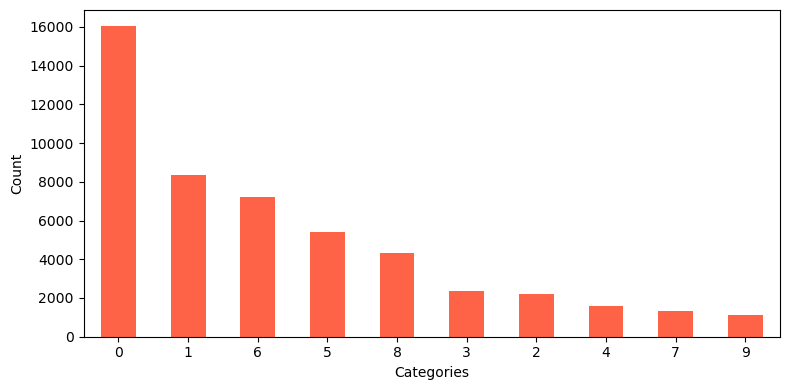


Statistical measures for input text (character-level):



,text
count,50000.00
mean,2792.46
std,4167.31
min,141.00
25%,746.00
50%,1537.00
75%,3312.25
max,156368.00


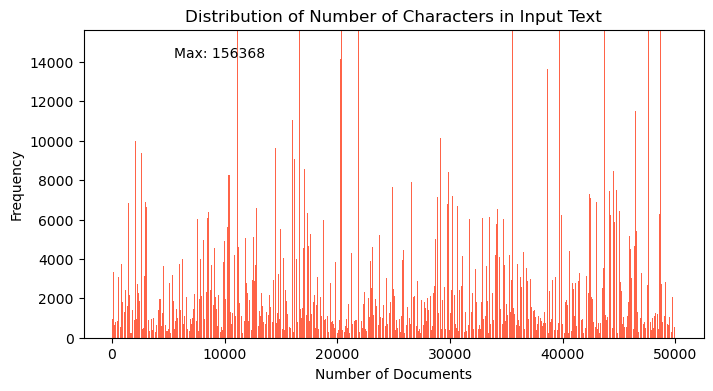

Statistical measures for input text (word-level):



,text
count,50000.00
mean,398.59
std,596.07
min,16.00
25%,107.00
50%,217.00
75%,469.00
max,21121.00


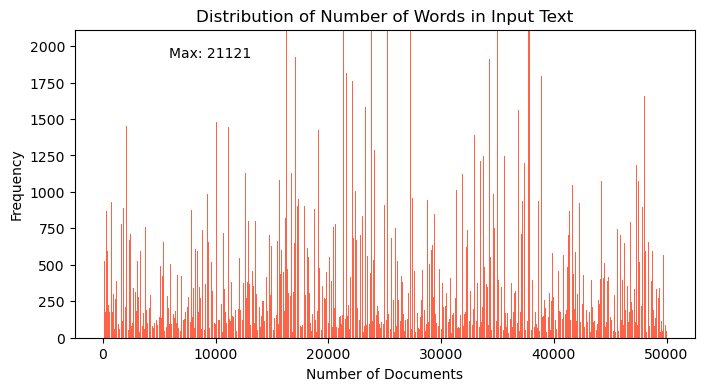

In [10]:
import sys
sys.path.append("..")

from utils import analyze_dataset 

analyze_dataset(interpress_train[:50000], 
                (8, 4), (8, 4), (8, 4), 
                0.1, 0.09,
                0.1, 0.09,
                'tomato', 'Interpress')

In [11]:
# interpress_train.to_csv("../Data/Interpress/interpress_train.csv", index=False)
# interpress_test.to_csv("../Data/Interpress/interpress_test.csv", index=False)

## Fine Tune

In [1]:
import torch
import pandas as pd

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

### Preprocess Dataset

In [12]:
# import pandas as pd

# interpress_train = pd.read_csv("../Data/Interpress/interpress_train.csv")
# interpress_test = pd.read_csv("../Data/Interpress/interpress_test.csv")

# display(interpress_train, interpress_test)

,text,label
0,Tarihten Sınıfta Kaldık Bugün tarihe damgasını...,0
1,"clş yatırım ortamı iyileştiriliyor , bürokrasi...",1
2,Animasyon meraklıları Yönetmen JenniferYuh Ses...,0
3,T BEEF JJ SVftSL ff BEEFSFISH KIRMIZI ET N FRA...,0
4,LPG Dolum Boşaltım kursu KTSO yapıldı Karaman ...,1
...,...,...
218875,Begüm Mert Yazıcıoğiu çiftinin ikinci bebekler...,7
218876,AKRAPOVIC FULL MOON Fiyat açıklanmadı konsept ...,6
218877,Babil bal Notlar Bugün Şenkaya ilçesine bağlı ...,0
218878,ÇEVRE STAT ST KLER N N ÖZETLER YAYINLANDI Türk...,1


,text,label
0,yıldır yükselen enerji Aygaz TÜRK HALKINI TÜPG...,1
1,Onur Akyıl Bir insan kadar mutsuzBir insan kad...,0
2,. yolculuk GÜNEYL SARIŞIN REESE WITHERSPOON Ye...,0
3,Doğru tercih yapan hiçbir aday açıkta kalmayac...,3
4,Jong sıraya girdiler SER E A ekiplerinden Mi i...,5
...,...,...
54716,"SAMBACI JAJA ALKOL ENGEL TAKILDI .m , TRABZONS...",5
54717,"Gıda Tarım Hayvancılık Bakanı Faruk Çelik , ek...",1
54718,PANORAMA Uftk . Uluslararası Whitley Doğa Koru...,0
54719,Patates tüketiminin artırılması hedefleniyor A...,1


In [5]:
text_labels = ['kültürsanat', 'ekonomi', 'siyaset', 'eğitim', 'dünya', 'spor', 'teknoloji', 'magazin', 'sağlık', 'gündem']
int_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_labels = len(int_labels)

id2label = {label: text_label for label, text_label in zip(int_labels, text_labels)}
label2id = {text_label: label for label, text_label in zip(int_labels, text_labels)}

print(id2label, label2id, sep="\n")

{0: 'kültürsanat', 1: 'ekonomi', 2: 'siyaset', 3: 'eğitim', 4: 'dünya', 5: 'spor', 6: 'teknoloji', 7: 'magazin', 8: 'sağlık', 9: 'gündem'}
{'kültürsanat': 0, 'ekonomi': 1, 'siyaset': 2, 'eğitim': 3, 'dünya': 4, 'spor': 5, 'teknoloji': 6, 'magazin': 7, 'sağlık': 8, 'gündem': 9}


In [15]:
# from sklearn.utils import resample
# from sklearn.model_selection import train_test_split

# # Train %80 and Val %20
# interpress_train, interpress_val = train_test_split(interpress_train, test_size=0.3, random_state=42)

In [16]:
# def undersample_data(data, samples_per_class, random_state=42):
    
#     undersampled_data = pd.DataFrame()
    
#     for label in data['label'].unique():
#         class_samples = data[data['label'] == label]
#         undersampled_class = resample(class_samples, replace=False, n_samples=samples_per_class, random_state=random_state)
        
#         undersampled_data = pd.concat([undersampled_data, undersampled_class])

#     return undersampled_data

# samples_per_class_train = 600
# samples_per_class_val = 100
# samples_per_class_test = 100

# interpress_train = undersample_data(interpress_train, samples_per_class_train)
# interpress_val = undersample_data(interpress_val, samples_per_class_val)
# interpress_test = undersample_data(interpress_test, samples_per_class_test)  

# # Shuffle the undersampled sets
# interpress_train = interpress_train.sample(frac=1, random_state=42).reset_index(drop=True)
# interpress_val = interpress_val.sample(frac=1, random_state=42).reset_index(drop=True)
# interpress_test = interpress_test.sample(frac=1, random_state=42).reset_index(drop=True)

# interpress_train.to_csv("../Data/Interpress/interpress_train_undersampled.csv", index=False)
# interpress_val.to_csv("../Data/Interpress/interpress_val_undersampled.csv", index=False)
# interpress_test.to_csv("../Data/Interpress/interpress_test_undersampled.csv", index=False)

In [6]:
interpress_train = pd.read_csv("../Data/Interpress/interpress_train_undersampled.csv")
interpress_val = pd.read_csv("../Data/Interpress/interpress_val_undersampled.csv")
interpress_test = pd.read_csv("../Data/Interpress/interpress_test_undersampled.csv")

X_train = interpress_train['text'].tolist()
y_train = interpress_train['label'].tolist()

X_val = interpress_val['text'].tolist()
y_val = interpress_val['label'].tolist()

X_test = interpress_test['text'].tolist()
y_test = interpress_test['label'].tolist()

print("Train set shape      :", len(X_train), len(y_train))
print("Validation set shape :", len(X_val), len(y_val))
print("Test set shape       :", len(X_test), len(y_test))

Train set shape      : 6000 6000
Validation set shape : 1000 1000
Test set shape       : 1000 1000


### Prepare Training

In [3]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


def compute_metrics(preds): 
    
    labels = preds.label_ids 
    preds = preds.predictions.argmax(-1) 
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro') 
    acc = accuracy_score(labels, preds) 
    
    return { 
        'Accuracy': acc, 
        'F1': f1, 
        'Precision': precision, 
        'Recall': recall 
    }


def predict(model, tokenizer, text):
    
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to(device)
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    
    return probs, probs.argmax(),model.config.id2label[probs.argmax().item()]

### BERTTurk

In [14]:
from transformers import BertTokenizerFast, BertForSequenceClassification

tokenizer_bert = BertTokenizerFast.from_pretrained("dbmdz/bert-base-turkish-uncased", max_length=512)
model_Bert = BertForSequenceClassification.from_pretrained("dbmdz/bert-base-turkish-uncased", num_labels=num_labels, id2label=id2label, label2id=label2id).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
train_encodings = tokenizer_bert(X_train, truncation=True, padding=True)
val_encodings  = tokenizer_bert(X_val, truncation=True, padding=True)
test_encodings = tokenizer_bert(X_test, truncation=True, padding=True)

from torch.utils.data import Dataset

class MyDataset(Dataset):
    
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
        
    def __len__(self):
        return len(self.labels)

train_dataset = MyDataset(train_encodings, y_train)
val_dataset = MyDataset(val_encodings, y_val)
test_dataset = MyDataset(test_encodings, y_test)

#### Train

In [21]:
training_args = TrainingArguments(
    output_dir='../Models/bertturk_text_classification_fine_tuned_interpress/', 
    do_train=True,
    do_eval=True,
    num_train_epochs=3,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=32,
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',              
    logging_dir='../Output/BERT_Logs_Interpress',            
    logging_steps=100,
    evaluation_strategy="epoch",
    eval_steps=1,
    save_strategy="epoch",
    save_steps=1,
    fp16=True,
    load_best_model_at_end=True
)

trainer_bert = Trainer(
    model=model,                    
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

In [22]:
trainer_bert.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.523300,0.580452,0.822000,0.819397,0.826923,0.822000
2,0.309500,0.534316,0.842000,0.840395,0.843852,0.842000
3,0.114300,0.594031,0.843000,0.844432,0.849806,0.843000


TrainOutput(global_step=1125, training_loss=0.4324956893920898, metrics={'train_runtime': 7878.8849, 'train_samples_per_second': 2.285, 'train_steps_per_second': 0.143, 'total_flos': 4736339177472000.0, 'train_loss': 0.4324956893920898, 'epoch': 3.0})

#### Evaluate

In [23]:
result = [trainer_bert.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(result, index=["train", "val", "test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.135738,0.960833,0.960398,0.961683,0.960833
val,0.534316,0.842000,0.840395,0.843852,0.842000
test,0.438821,0.868000,0.863542,0.867251,0.868000


In [24]:
text = "Fenerbahçeli futbolcular kısa paslarla hazırlık çalışması yaptılar"
predict(text)[0]

tensor([[0.0025, 0.0011, 0.0016, 0.0016, 0.0010, 0.9800, 0.0013, 0.0070, 0.0016,
         0.0024]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

#### Save Model

In [25]:
model_path = "bertturk_text_classification_fine_tuned_interpress"
trainer_bert.save_model(model_path)
tokenizer_bert.save_pretrained(model_path)

('bert_text_classification_fine_tuned_interpress\\tokenizer_config.json',
 'bert_text_classification_fine_tuned_interpress\\special_tokens_map.json',
 'bert_text_classification_fine_tuned_interpress\\vocab.txt',
 'bert_text_classification_fine_tuned_interpress\\added_tokens.json',
 'bert_text_classification_fine_tuned_interpress\\tokenizer.json')

### TurkishBERTweet

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_tbt = AutoTokenizer.from_pretrained("VRLLab/TurkishBERTweet", max_length=128)
model_tbt = AutoModelForSequenceClassification.from_pretrained("VRLLab/TurkishBERTweet", num_labels=num_labels, id2label=id2label, label2id=label2id)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at VRLLab/TurkishBERTweet and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_encodings = tokenizer_tbt(X_train, truncation=True, padding=True, max_length=128)
val_encodings  = tokenizer_tbt(X_val, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer_tbt(X_test, truncation=True, padding=True, max_length=128)

from torch.utils.data import Dataset

class MyDataset(Dataset):
    
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
        
    def __len__(self):
        return len(self.labels)

train_dataset = MyDataset(train_encodings, y_train)
val_dataset = MyDataset(val_encodings, y_val)
test_dataset = MyDataset(test_encodings, y_test)

#### Train

In [9]:
training_args = TrainingArguments(
    output_dir='../Models/turkishbertweet_text_classification_fine_tuned_interpress/', 
    do_train=True,
    do_eval=True,
    num_train_epochs=3,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=32,
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',              
    logging_dir='../Output/TBT_Logs_Interpress',            
    logging_steps=100,
    evaluation_strategy="epoch",
    eval_steps=1,
    save_strategy="epoch",
    save_steps=1,
    fp16=True,
    load_best_model_at_end=True
)

trainer_tbt = Trainer(
    model=model_tbt,                    
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

In [10]:
trainer_tbt.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.057400,0.923491,0.699000,0.693820,0.704609,0.699000
2,0.446100,0.887650,0.721000,0.723308,0.742017,0.721000
3,0.150400,1.016317,0.767000,0.768786,0.772489,0.767000


TrainOutput(global_step=1125, training_loss=0.696331046210395, metrics={'train_runtime': 280.3881, 'train_samples_per_second': 64.197, 'train_steps_per_second': 4.012, 'total_flos': 1184084794368000.0, 'train_loss': 0.696331046210395, 'epoch': 3.0})

#### Evaluate

In [11]:
result = [trainer_tbt.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(result, index=["train", "val", "test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.208153,0.939667,0.940103,0.944196,0.939667
val,0.887650,0.721000,0.723308,0.742017,0.721000
test,0.785150,0.760000,0.760268,0.779226,0.760000


In [12]:
text = "Fenerbahçeli futbolcular kısa paslarla hazırlık çalışması yaptılar"
predict(model_tbt, tokenizer_tbt, text)[0]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


tensor([[7.6846e-04, 9.9398e-04, 1.4967e-03, 1.0493e-03, 6.7684e-04, 9.9103e-01,
         3.7893e-04, 2.4855e-03, 6.5218e-04, 4.7067e-04]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

#### Save Model

In [13]:
model_path = "turkishbertweet_text_classification_fine_tuned_interpress"

trainer_tbt.save_model(model_path)
tokenizer_tbt.save_pretrained(model_path)

('turkishbertweet_text_classification_fine_tuned_interpress\\tokenizer_config.json',
 'turkishbertweet_text_classification_fine_tuned_interpress\\special_tokens_map.json',
 'turkishbertweet_text_classification_fine_tuned_interpress\\vocab.json',
 'turkishbertweet_text_classification_fine_tuned_interpress\\merges.txt',
 'turkishbertweet_text_classification_fine_tuned_interpress\\added_tokens.json',
 'turkishbertweet_text_classification_fine_tuned_interpress\\tokenizer.json')